<h1> 數據增強

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import cv2
from keras.models import load_model,Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D,Dropout,Flatten,AveragePooling2D,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.utils import plot_model
from keras.backend import set_session,clear_session,get_session
from skimage.util import random_noise
from PIL import Image
import gc, random

In [6]:
files = glob.glob("./train/fox/*.jpg")
data = [cv2.resize(cv2.imread(i), (128, 128)) for i in files]
data = np.array(data)
data = (data.astype("float32")/255)
data.shape

(433, 128, 128, 3)

In [15]:
def data_augmentation(img, save_dir="./train/from tensorflow.keras.callbacks import EarlyStopping_data_augmented"):
    for i in range(0, len(img)):
        img_processing = img[i].copy()
        num = random.randint(1,9)
        if num == 1:       # 加噪聲
            img_processing = random_noise(img_processing, mode = "gaussian", rng = None, clip = True)
            
        elif num == 2:  # 亮度調整
            alpha = random.uniform(0.7, 0.8)
            blank = np.zeros(img_processing.shape, img_processing.dtype)
            img_processing = cv2.addWeighted(img_processing, alpha, blank, 1 - alpha, 0)
            
        elif num == 3:  # 旋轉
            img_processing = Image.fromarray((img_processing * 255).astype(np.uint8))
            random_angle = random.randint(-30, 30)
            if random_angle == 0:
                img_processing = img_processing.rotate(15)
            else:
                img_processing = img_processing.rotate(random_angle, expand = "False")
            img_processing = np.array(img_processing)
            img_processing = cv2.resize(img_processing, (128, 128))
            img_processing = img_processing / 255.0
            
        elif num == 4:  # 平移
            height, width = img_processing.shape[:2]
            x_move = random.randint(-25,25)
            y_move = random.randint(-25,25)
            M = np.float32([[1, 0, x_move], [0, 1, y_move]])
            img_processing = cv2.warpAffine(img_processing, M, (width, height))

        elif num == 5:  # 鏡像
            img_processing = cv2.flip(img_processing, 1)

        elif num == 6:  # 裁剪
            height, width = img_processing.shape[:2]
            x_start = random.randint(0, width // 8)
            y_start = random.randint(0, height // 8)
            img_processing = img_processing[y_start:y_start + int(height // 1.2), x_start:x_start + int(width // 1.2)]
            img_processing = cv2.resize(img_processing, (128, 128))
            
        elif num == 7:  # 模糊
            img_processing = cv2.GaussianBlur(img_processing, (5, 5), 0)
            
        elif num == 8:  # 仿射變換
            height, width = img_processing.shape[:2]
            pts1 = np.float32([[0, 0], [width, 0], [0, height]])
            pts2 = np.float32([[random.randint(0, 10), random.randint(0, 10)], 
                               [width - random.randint(0, 10), random.randint(0, 10)], 
                               [random.randint(0, 10), height - random.randint(0, 10)]])
            M = cv2.getAffineTransform(pts1, pts2)
            img_processing = cv2.warpAffine(img_processing, M, (width, height))
            
        else:  # 隨機擦除
            height, width = img_processing.shape[:2]
            erase_h = random.randint(height // 10, height // 5)
            erase_w = random.randint(width // 10, width // 5)
            x_erase = random.randint(0, width - erase_w)
            y_erase = random.randint(0, height - erase_h)
            img_processing[y_erase:y_erase+erase_h, x_erase:x_erase+erase_w, :] = 0

        '''
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img[i][:, :, [2, 1, 0]])
        plt.axis('off')
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(img_processing[:, :, [2, 1, 0]])
        plt.axis('off')
        plt.title(f'Processed Image : {num}')
        plt.show()
        '''
        
        img_save = Image.fromarray((img_processing * 255).astype(np.uint8), mode="RGB")
        save_path = os.path.join(save_dir, f"processed_image_{i}_type_{num}.png")
        img_save.save(save_path, format='PNG')

In [17]:
for i in range(0, 20):
    data_augmentation(data)

## 噪聲

In [7]:
# 用skimage的random_noise套件
img_noise = random_noise(data[5], mode='gaussian', rng=None, clip=True)
# mode可選項: "gaussian"高斯分布噪聲, "salt"隨機像素替換為1, "pepper"隨機像素替換為0或者-1

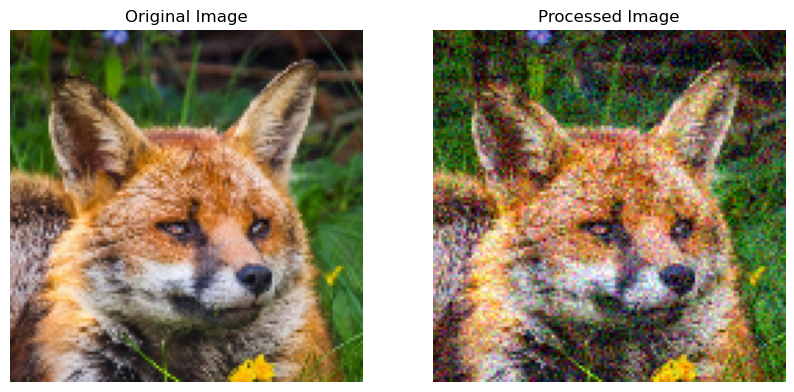

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data[5][:, :, [2, 1, 0]])
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_noise[:, :, [2, 1, 0]])
plt.axis('off')
plt.title('Processed Image')
plt.show()

## 亮度調整

In [9]:
# 透過cv2.addWeighted結合影像來調整亮度
alpha = random.uniform(0.35, 1) # 隨機範圍內的生成浮點數
blank = np.zeros(data[5].shape, data[5].dtype) # 創建一個shape與圖片相同的全0的空白陣列
img_addweight = cv2.addWeighted(data[5], alpha, blank, 1 - alpha, 0) # 將原圖和黑色圖片(blank)按比例進行融合,alpha控制圖像的透明度

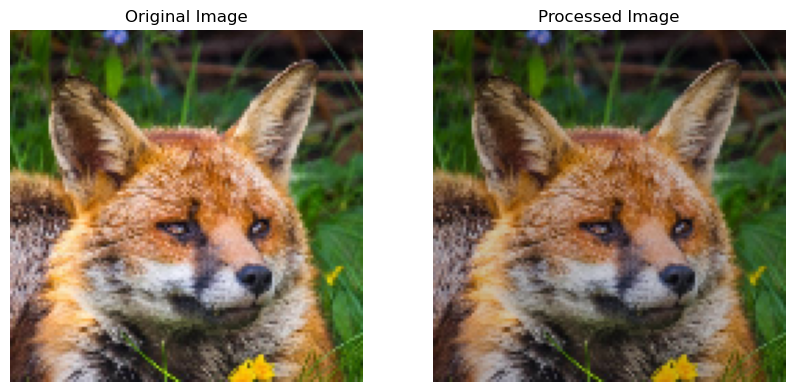

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data[5][:, :, [2, 1, 0]])
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_addweight[:, :, [2, 1, 0]])
plt.axis('off')
plt.title('Processed Image')
plt.show()

## 旋轉

In [11]:
# img = Image.open("./train/fox/flickr_wild_000011.jpg")
img = Image.fromarray((data[5] * 255).astype(np.uint8))
random_angle = random.randint(-30, 30)
if random_angle == 0:
    img_rotate = img.rotate(15)
else:
    img_rotate = img.rotate(random_angle, expand = "False")
img_rotate = np.array(img_rotate)
img_rotate = cv2.resize(img_rotate, (128, 128))
img_rotate = img_rotate / 255.0

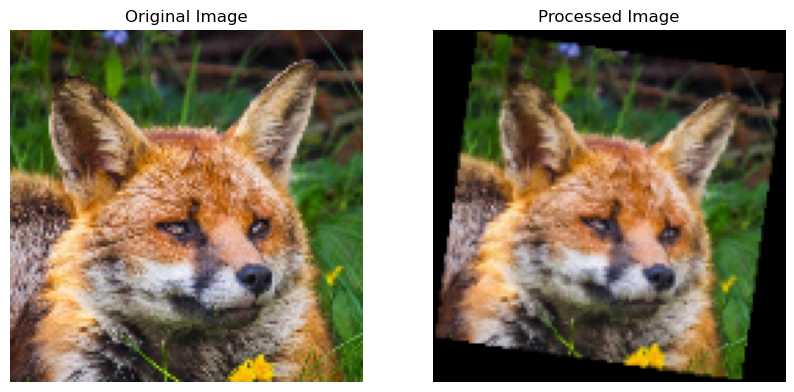

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data[5][:, :, [2, 1, 0]])
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_rotate[:, :, [2, 1, 0]])
plt.axis('off')
plt.title('Processed Image')
plt.show()

## 平移

In [13]:
# 獲取影像的尺寸
height, width = data[5].shape[:2]

# 定義平移的矩陣 (x_move, y_move)
x_move = random.randint(-25,25)  # 隨機產生x平移值
y_move = random.randint(-25,25)  # 隨機產生y平移值
M = np.float32([[1, 0, x_move], [0, 1, y_move]])

# 使用 cv2.warpAffine 進行平移
image_moved = cv2.warpAffine(data[5], M, (width, height))

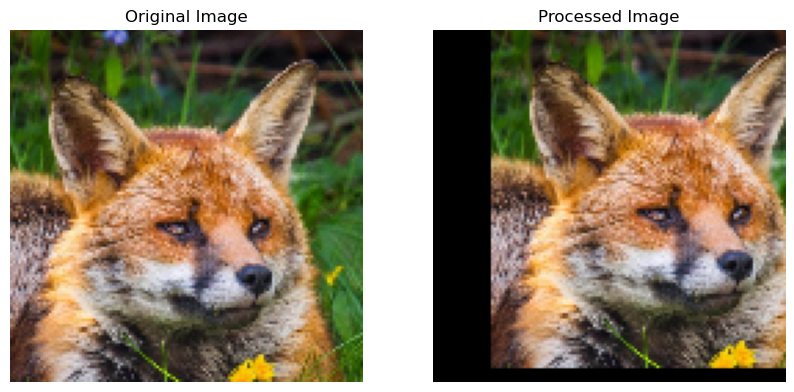

In [14]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data[5][:, :, [2, 1, 0]])
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(image_moved[:, :, [2, 1, 0]])
plt.axis('off')
plt.title('Processed Image')
plt.show()

## 鏡像

In [15]:
img_flip = cv2.flip(data[5], 1)

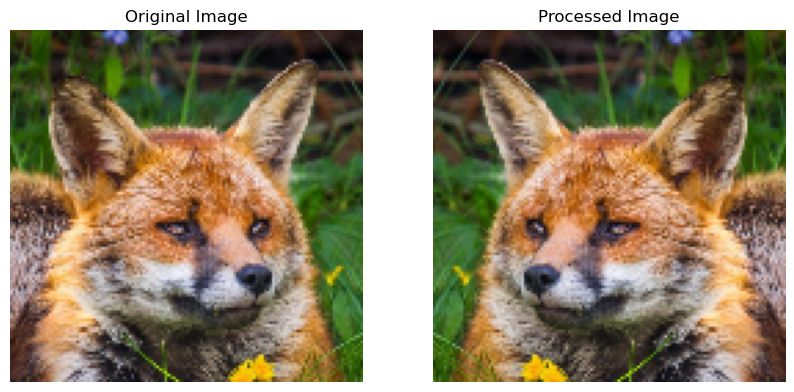

In [16]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data[5][:, :, [2, 1, 0]])
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_flip[:, :, [2, 1, 0]])
plt.axis('off')
plt.title('Processed Image')
plt.show()

## 裁剪

In [17]:
height, width = data[5].shape[:2]
x_start = random.randint(0, width // 8)
y_start = random.randint(0, height // 8)
img_cut = data[5][y_start:y_start + int(height // 1.2), x_start:x_start + int(width // 1.2)]
img_cut = cv2.resize(img_cut, (128, 128))

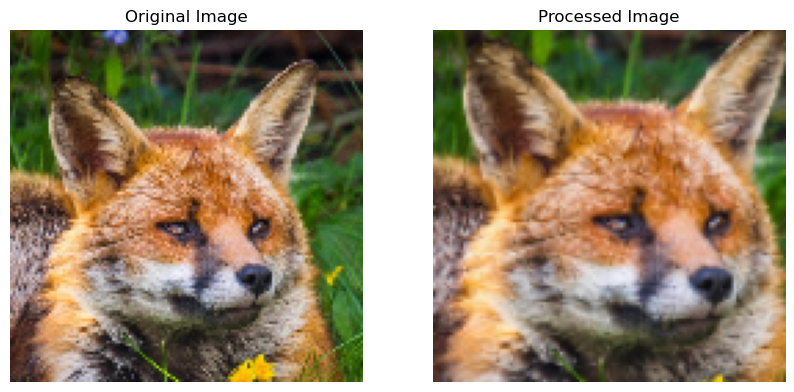

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data[5][:, :, [2, 1, 0]])
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_cut[:, :, [2, 1, 0]])
plt.axis('off')
plt.title('Processed Image')
plt.show()

## 模糊

In [19]:
img_vague = cv2.GaussianBlur(data[5], (5, 5), 0)

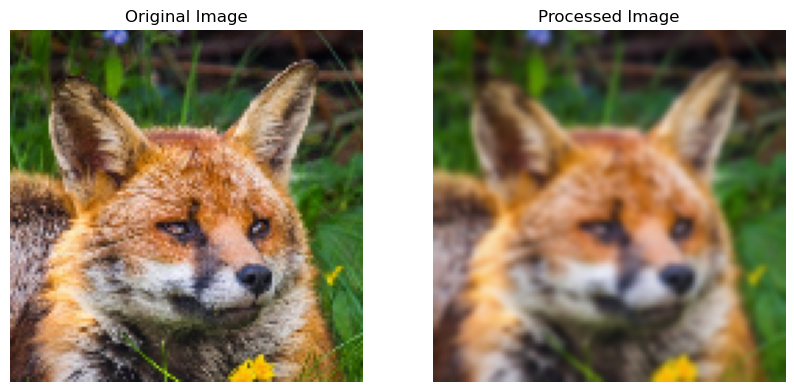

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data[5][:, :, [2, 1, 0]])
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_vague[:, :, [2, 1, 0]])
plt.axis('off')
plt.title('Processed Image')
plt.show()

## 仿射變換

In [21]:
height, width = data[5].shape[:2]
pts1 = np.float32([[0, 0], [width, 0], [0, height]])
pts2 = np.float32([[random.randint(0, 10), random.randint(0, 10)], 
                   [width - random.randint(0, 10), random.randint(0, 10)], 
                   [random.randint(0, 10), height - random.randint(0, 10)]])
M = cv2.getAffineTransform(pts1, pts2)
img_affine_transformation = cv2.warpAffine(data[5], M, (width, height))

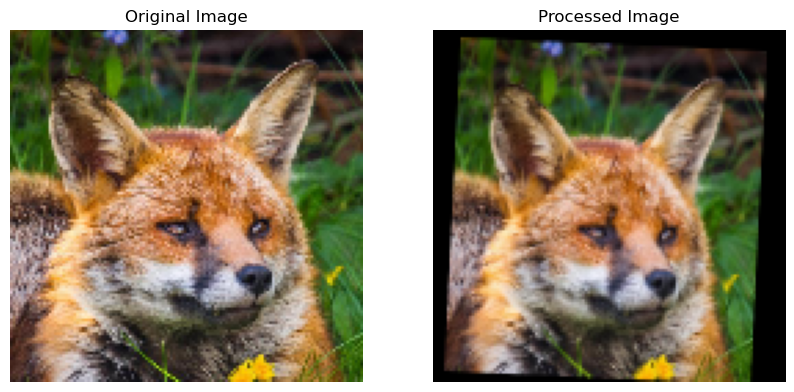

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data[5][:, :, [2, 1, 0]])
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_affine_transformation[:, :, [2, 1, 0]])
plt.axis('off')
plt.title('Processed Image')
plt.show()

## 隨機擦除

In [23]:
height, width = data[5].shape[:2]
img_rderase = data[5].copy()
erase_h = random.randint(height // 10, height // 5)
erase_w = random.randint(width // 10, width // 5)
x_erase = random.randint(0, width - erase_w)
y_erase = random.randint(0, height - erase_h)
img_rderase[y_erase:y_erase+erase_h, x_erase:x_erase+erase_w, :] = 0

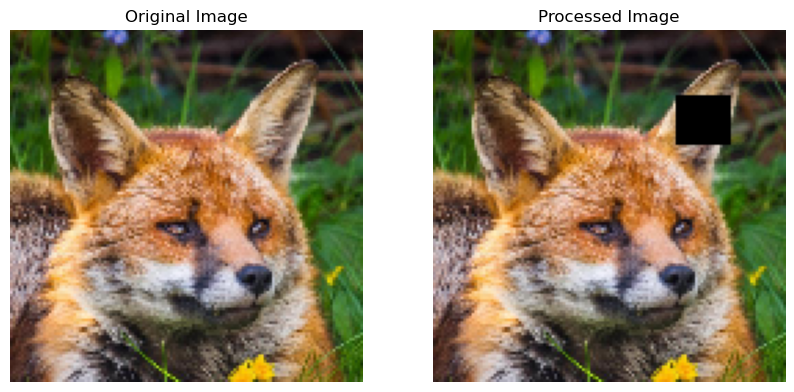

In [25]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data[5][:, :, [2, 1, 0]])
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_rderase[:, :, [2, 1, 0]])
plt.axis('off')
plt.title('Processed Image')
plt.show()